## Loading Libraraies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading Data

In [3]:
churn=pd.read_csv("churn.csv")
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Data Exploration

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


Check for missing values

In [5]:
#check missing values 

churn.columns[churn.isnull().any()]

Index([], dtype='object')

Out of 21 features , none of them have missing values

In [6]:
print("There are {} numeric and {} categorical columns in churn data".format(churn.select_dtypes(include=[np.number]).shape[1],churn.select_dtypes(exclude=[np.number]).shape[1]))

There are 16 numeric and 5 categorical columns in churn data


In [8]:
churn.select_dtypes(exclude=[np.number]).head()

,State,Phone,Int'l Plan,VMail Plan,Churn?
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.


The columns "state" and "phone" are not usefull in perdicting the target variable 

### Data Preprocessing

In [9]:
X=churn.iloc[:,4:20].values
Y=churn.iloc[:, 20].values


converting catagorical data to numeric (using Label Encoding)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])
labelencoder_X_2 = LabelEncoder()
X[:, 1] = labelencoder_X_2.fit_transform(X[:, 1])
labelencoder_Y=LabelEncoder()
Y=labelencoder_Y.fit_transform(Y)


Visualizing the correlation of data

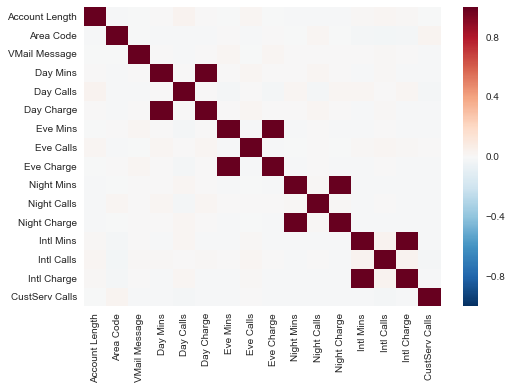

In [11]:
cor=churn.corr()
sns.heatmap(cor)

Scaling data by Standerd Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

C:\Users\hp pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\hp pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


As you can see the DataConversionWarning it means our Data is know Scaled. lets visualize it.

In [13]:
X

array([[-0.32758048,  1.6170861 ,  1.23488274, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [-0.32758048,  1.6170861 ,  1.30794844, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [-0.32758048, -0.61839626, -0.59175986, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ..., 
       [-0.32758048, -0.61839626, -0.59175986, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [ 3.05268496, -0.61839626, -0.59175986, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [-0.32758048,  1.6170861 ,  1.23488274, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

### Training model 

In [14]:
#importing labrararies for Artifical Nural network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

Using TensorFlow backend.


Making objects of our Classifier

In [15]:
clf=Sequential()

Building Layers for our ANN

In [16]:
#adding layers to ANN
clf.add(Dense(units=24,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=16))
#adding two more hidden layer to ANN
clf.add(Dense(units=24,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dense(units=24,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
#adding output layer
clf.add(Dense(units=1,activation="sigmoid",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Fitting ANN

In [18]:
history=clf.fit(X,Y,batch_size=20,epochs=250)

Epoch 1/250
3333/3333 [==============================] - 0s 81us/step - loss: 0.1912 - acc: 0.9487
Epoch 2/250
3333/3333 [==============================] - 0s 75us/step - loss: 0.1950 - acc: 0.9460
Epoch 3/250
3333/3333 [==============================] - 0s 74us/step - loss: 0.1895 - acc: 0.9490
Epoch 4/250
3333/3333 [==============================] - 0s 75us/step - loss: 0.1892 - acc: 0.9487
Epoch 5/250
3333/3333 [==============================] - 0s 71us/step - loss: 0.1890 - acc: 0.9448
Epoch 6/250
3333/3333 [==============================] - 0s 91us/step - loss: 0.1904 - acc: 0.9499
Epoch 7/250
3333/3333 [==============================] - 0s 89us/step - loss: 0.1877 - acc: 0.9466
Epoch 8/250
3333/3333 [==============================] - 0s 89us/step - loss: 0.1883 - acc: 0.9466
Epoch 9/250
3333/3333 [==============================] - 0s 86us/step - loss: 0.1868 - acc: 0.9478
Epoch 10/250
3333/3333 [==============================] - 0s 86us/step - loss: 0.1865 - acc: 0.9487
Epoch 11/

3333/3333 [==============================] - 0s 72us/step - loss: 0.1580 - acc: 0.9577
Epoch 83/250
3333/3333 [==============================] - 0s 61us/step - loss: 0.1520 - acc: 0.9607
Epoch 84/250
3333/3333 [==============================] - 0s 62us/step - loss: 0.1525 - acc: 0.9580
Epoch 85/250
3333/3333 [==============================] - 0s 63us/step - loss: 0.1554 - acc: 0.9592
Epoch 86/250
3333/3333 [==============================] - 0s 67us/step - loss: 0.1606 - acc: 0.9514
Epoch 87/250
3333/3333 [==============================] - 0s 63us/step - loss: 0.1545 - acc: 0.9607
Epoch 88/250
3333/3333 [==============================] - 0s 63us/step - loss: 0.1521 - acc: 0.9598
Epoch 89/250
3333/3333 [==============================] - 0s 64us/step - loss: 0.1527 - acc: 0.9592
Epoch 90/250
3333/3333 [==============================] - 0s 66us/step - loss: 0.1545 - acc: 0.9595
Epoch 91/250
3333/3333 [==============================] - 0s 68us/step - loss: 0.1533 - acc: 0.9607
Epoch 92/250


3333/3333 [==============================] - 0s 63us/step - loss: 0.1409 - acc: 0.9631
Epoch 164/250
3333/3333 [==============================] - 0s 59us/step - loss: 0.1447 - acc: 0.9613
Epoch 165/250
3333/3333 [==============================] - 0s 58us/step - loss: 0.1430 - acc: 0.9628
Epoch 166/250
3333/3333 [==============================] - 0s 58us/step - loss: 0.1431 - acc: 0.9634
Epoch 167/250
3333/3333 [==============================] - 0s 61us/step - loss: 0.1414 - acc: 0.9643
Epoch 168/250
3333/3333 [==============================] - 0s 58us/step - loss: 0.1430 - acc: 0.9628
Epoch 169/250
3333/3333 [==============================] - 0s 61us/step - loss: 0.1388 - acc: 0.9658
Epoch 170/250
3333/3333 [==============================] - 0s 61us/step - loss: 0.1419 - acc: 0.9631
Epoch 171/250
3333/3333 [==============================] - 0s 58us/step - loss: 0.1405 - acc: 0.9631
Epoch 172/250
3333/3333 [==============================] - 0s 61us/step - loss: 0.1410 - acc: 0.9658
Epoc

3333/3333 [==============================] - 0s 72us/step - loss: 0.1358 - acc: 0.9658
Epoch 245/250
3333/3333 [==============================] - 0s 63us/step - loss: 0.1362 - acc: 0.9649
Epoch 246/250
3333/3333 [==============================] - 0s 62us/step - loss: 0.1352 - acc: 0.9637
Epoch 247/250
3333/3333 [==============================] - 0s 61us/step - loss: 0.1332 - acc: 0.9673
Epoch 248/250
3333/3333 [==============================] - 0s 62us/step - loss: 0.1342 - acc: 0.9649
Epoch 249/250
3333/3333 [==============================] - 0s 62us/step - loss: 0.1416 - acc: 0.9622
Epoch 250/250
3333/3333 [==============================] - 0s 69us/step - loss: 0.1344 - acc: 0.9664


Displaying curves of loss and accuracy during training

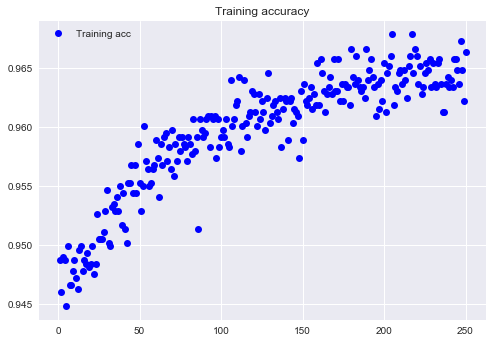

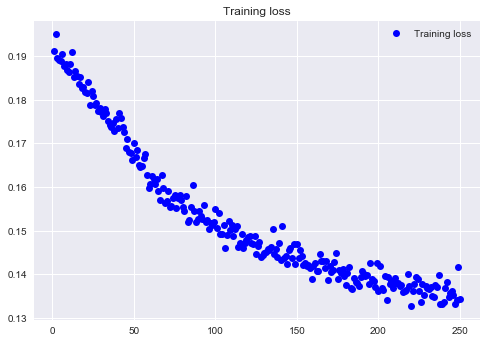

In [19]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

we can conclude that the model got accuracy of about 97% and was still increasing at slow rate after 250 epochs